In [61]:
import pandas as pd
#create column names
columns = ["lineID", "characterID", "movieID", "character", "text"]
lines_df = pd.read_csv("/Users/naomigong/Coding/Movie_Character_Project/data/movie_lines.tsv", sep="\t", on_bad_lines='skip', names= columns)
lines_df.shape


(293202, 5)

Explore if there if particular movies have more lines missing.
If they have too many lines missing (more than 10%), remove all the movies from the dataframe

Text(50.72222222222221, 0.5, 'Missing Values')

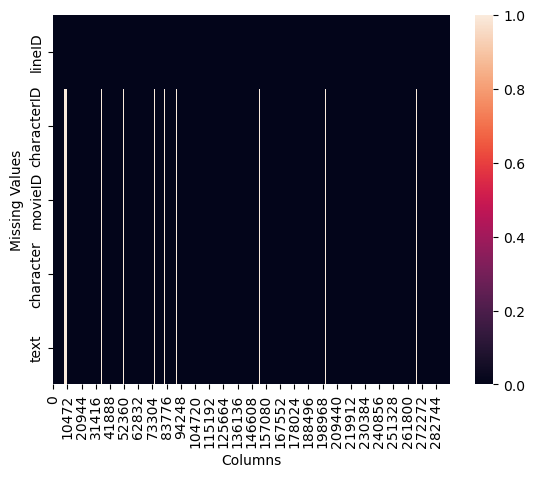

In [12]:
#check if a particular movie id corresponds with being null
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()
sns.heatmap(lines_df.isna().transpose())
plt.xlabel("Columns")
plt.ylabel("Missing Values")


Here, we want to find the movies with more than 5% of their data missing and drop them completely. 

For the rest, if they have missing data we can just drop the rows with missing data
(This step may not necessarily be necessary for sentiment analysis since we are just using the character lines, but we may need to do further cleaning for character identification)

In [ ]:
movieID_group = lines_df.groupby("movieID")
na_count_per_movie = movieID_group.apply(lambda group: group.isna().any(axis=1).sum())
print(max(na_count_per_movie))
max_id = na_count_per_movie[na_count_per_movie==max(na_count_per_movie)].index.tolist()

lines_count_per_movie = movieID_group.apply(lambda group: group.shape[0])
print(lines_count_per_movie[max_id[0]])
movies_to_drop = []
for movieid, na_count in na_count_per_movie.items():
    if lines_count_per_movie[movieid] * 0.05 < na_count:
        movies_to_drop.append(movieid)
for movie in movies_to_drop:
    print("lines with this movie id is", lines_count_per_movie[movie])


185
1390
lines with this movie id is 424
lines with this movie id is 1390


/var/folders/f4/_5js21356_g8zx61755lqs1m0000gn/T/ipykernel_83086/2982954535.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  na_count_per_movie = movieID_group.apply(lambda group: group.isna().any(axis=1).sum())
/var/folders/f4/_5js21356_g8zx61755lqs1m0000gn/T/ipykernel_83086/2982954535.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  lines_count_per_movie = movieID_group.apply(lambda group: group.sha

In [ ]:
#dropping all the rows with the ids found above
lines_df = lines_df[~lines_df["movieID"].isin(movies_to_drop)]
lines_df.shape

(291388, 5)

In [63]:
#now drop the remaining na rows
lines_df.dropna(inplace=True)

In [66]:
#finding the number of unique movies
len(movieID_group)

607

In [14]:
#lines_df.isna().sum()


In [15]:
#lines_df.dropna(inplace=True)